## Imports

In [1]:
import numpy as np
import sympy
import matplotlib.pyplot as plt

## Constants

In [2]:
E = 26.2 * 10**9                # elastic modulus of aluminum (Pa)
rho = 2700                      # density of aluminum (kg/m^3)
l = 34 / 39.37                  # length of bat (m) 
r = 1.25 / 39.37                # radius of baseball bat (m)
m = rho * l * np.pi * r**2      # mass of bat (kg)
F = 18000                       # force of ball on bat (N)

T = 20                           # elapsed time (s)

a = 0
b = l
n = 200
dt = 10**-3

In [3]:
k = E * (np.pi * r**2) / l
period = 2 * np.pi * (m / k)**(1/2)
c = (E / rho)
lamb = c * period

print(k)

96078642.48407428


In [4]:
# # Determine RHS using symbolic differentiation
# t = sympy.Symbol('T'); x = sympy.Symbol('X')
# uexa = sympy.sin(sympy.sin(np.pi*(x-a)/(b-a)))
# # RHS symbolic function
# f = sympy.diff(uexa, t) - c**2*sympy.diff(sympy.diff(uexa,x), x)
# # Making rhs function callable
# func = sympy.lambdify((x, t), f)
# g = func

## Estimation Functions

In [5]:
def u_e(x, t):
    """
    Returns the exact solution of the wave function (CURRENTLY WRONG)
    """
    
    amplitude = F / k
    waveNumber = 2 * np.pi / lamb
    omega = 2 * np.pi * (1 / period)
    
    print("k", k)
#     print("c", c)
#     print("period", period)
#     print("lamb", lamb)
#     print("waveNumber", waveNumber)
    
#     print("amplitude", amplitude)
    
    return amplitude * np.sin(waveNumber*x + omega*t) # * np.exp(-8*x) * * np.exp(-8*t)
    # return np.sin(x)

k 96078642.48407428


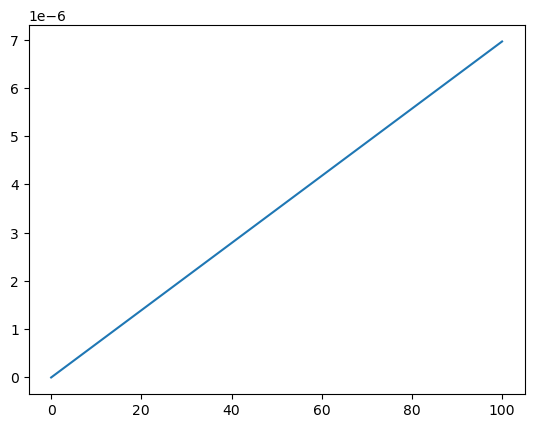

In [6]:
xx = np.linspace(0, 100, 1000)
plt.plot(xx, u_e(xx, 0))

In [7]:
def A_matrix(a, b, n, dt):
    """
    Returns the A matrix
    """
    x = np.linspace(a, b, n+1)
    dx = x[1] - x[0]
    cc = (c * dt / dx)**2
    A = cc * (np.eye(n-1, k=-1) - 2*np.eye(n-1) + np.eye(n-1, k=1))
    return A

In [8]:
def ivp_trap(a, b, n, dt, T, u_0):
    """
    Returns the approximated solution matrix using the trapezoid method
    """
    A = A_matrix(a, b, n, dt)
    time = np.arange(0, T + dt, dt)
    u = np.zeros([len(time), len(u_0)])
    for i in range(len(time)):
        if i == 0:
            u[0] = u_0
        if i > 0:
            denom = np.eye(A.shape[0]) - 0.5 * dt * A
            numer = u[i-1] + 0.5*dt*A@u[i-1] # + 0.5*dt*func(x,time[i-1]) + 0.5*dt*func(x,time[i-1] + dt)
            u[i] = np.linalg.solve(denom, numer)
#             print("Denom", denom)
#             print("Numer", numer)
    return u, time

## Plotting

In [9]:
# initializing lists
x_list = []
u_list = []
ut_list = []
err_list = []

# filling lists
x = np.linspace(a, b, n+1)[1:n]
u_0 = u_e(x, 0)
u, time = ivp_trap(a, b, n, dt, T, u_0)
ut = [u_e(x, time) for j in x]

x_list.append(x)
u_list.append(u[5000])
ut_list.append(ut)
# err_list.append(trap_error(u[500], ut))

k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428
k 96078642.48407428


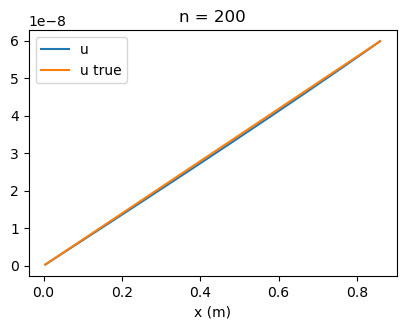

In [10]:
# plots
fig = plt.figure(figsize=(8, 6), tight_layout=True)

ax1 = fig.add_subplot(221)
ax1.plot(x_list[0], u_list[0], label = "u")
ax1.plot(x_list[0], ut_list[0][0], label = "u true")
plt.xlabel("x (m)")
ax1.set_title('n = 200')
plt.legend()